# Transient flow in a cross section, convolution

Transient flow in a single-layer cross section between fully pennetrating dtiches with the same water level; no resistance between the aquifer and the ditches. The ditch water levels may change as well as the recharge.
Convolution (Kraaijenoff Van der Leur)

@TO Nov. 2020

# The equations

The basic equation for the head after a sudden rise with a magnitude of $A$ [L] at $t=0$ at both ends of the cross section, may be attributed to Kraaijenhof van der Leur (Verruijt, 1999, p87). However it is also given in Carslaw & Jaeger 1959, pp97, eq.8). Some variants are futher given in Bruggeman (1999, p98 solution 1.33.02). It may be given as 

$$h-h_{LR}= 2 \, A \sum_{k=0}^{\infty}
\left\{
\frac{(-1)^k}{(k+\frac{1}{2})\pi}
\cos\left[\left(k+\frac{1}{2}\right)\pi\frac{x}{b}\right]
\exp\left[
-\left((k+\frac{1}{2})\pi\right)^{2}
\frac{\tau}{T}\right]
\right\}$$

with

$$T = \frac{b^2 \mu}{kD}$$

The average head $\overline{h}$ in the cross section is obtained by integrating the head along $x$ over $0 \le x \le b$ and dividing by $b$:

$$\overline{h}-h_{LR} = 2 \, A\sum_{k=0}^{\infty}
\left\{
\frac{(-1)^k}{\left((k+\frac{1}{2})\pi\right)^{2}}
\sin\left[\left(k+\frac{1}{2}\right)\pi\right]
\exp\left[
-\left((k+\frac{1}{2})\pi\right)^{2}
\frac{\tau}{T}\right]
\right\}$$

But then note that $\sin\left[\left(k + \frac 1 2\right)\pi\right] = \left(-1\right)^k$ so that the result becomes

$$ h-h_{LR}= 2 \, A \sum_{k=0}^{\infty}
\left\{
\frac{1}{\left((k+\frac{1}{2})\pi\right)^{2}}
\exp\left[
-\left((k+\frac{1}{2})\pi\right)^{2}
\frac{\tau}{T}\right]
\right\}$$


**Halftime** for larger times, when the second and higher terms can be neglected due to the rapidly declining exponent. It then follows from the exponent in the first term $k=0$. This halftime may be used for verification by chosing times at multiples of this halftime.

$$ \exp \left( - \left(\frac{\pi}{2}\right)^2\frac{t + \Delta t_{0.5}}{T}\right)
=0.5
\exp \left( - \left(\frac{\pi}{2}\right)^2\frac{t}{T}\right)
$$

$$ \left(\frac{\pi}{2}\right)^2\frac{t + \Delta t_{0.5}}{T}
= -\ln(0.5) + 
\left(\frac{\pi}{2}\right)^2\frac{t}{T}
$$

$$ \left(\frac{\pi}{2}\right)^2\frac{\Delta t_{0.5}}{T}
= \ln(2)
$$

$$ \Delta t_{0.5}
= \left(\frac{2}{\pi}\right)^{2}\ln(2) \,\, T
\approx 0.28 \, T
$$

## Implementations

In [62]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import pandas as pd
from importlib import reload
import pdb

In [380]:
def clrs():
    "Generator to return a successive color each time its called."
    clrs = 'brgkmc'
    for i in range(100):
        c = clrs[i % len(clrs)]
        yield c

In [253]:
def newfig(title="?", xlabel="?", ylabel="?", xlim=None, ylim=None,
           xscale=None, yscale=None, size_inches=(14, 8)):
    """Generate a new figure, return its axes."""
    fig, ax = plt.subplots()
    if size_inches: fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    ax.grid()
    return ax


def brug133_02(A=None, kD=None, S=None, b=None, x=None, times=None, n=20):
    """Return head change due to sudden head change at x+/-b.
    
    This is solution 133_02 in Bruggeman (1999)

    Parameters
    ----------
    A: float
        A = h0 - hLr = the initial head rise at x = 0 relative to the water level in the ditch.
    kD, S, b: floats
        transmissivity, storage coefficient and half-width of the cross section
    x: float or None (default)
        x value to show in cross section. If None, x values are chosen automatically.
        In that case x is returned as first object
    times: float or np.ndarray
        time or times at which to show the results
    n: int
        the number of terms to include
    """
    if not x is None and not np.isscalar(x):
        raise ValueError('x must be a scalar or None.')
    T = b ** 2 * S / kD
    
    if x is None:
        x = np.linspace(-b, b, 51)
        s = np.zeros_like(x)
    else:
        s = np.zeros_like(times)
        
    for k in range(n): # starts at 1
        kp05 = np.pi * (k + 0.5)
        s += (-1)**k / kp05 * np.cos(kp05 * x / b) * np.exp(- kp05 ** 2 * times/T)

    if not np.isscalar(x):
        return x, 2 * A * s
    else:
        return 2 * A * s

In [254]:
def brug133_02_mean(A, kD, S, b, times, n=20):
    """Return mean head change due to sudden head change at x+/-b.

    Parameters
    ----------
    A: float
        A = h0 - hLr = the initial head rise at x = 0 relative to the water level in the ditch.
    kD, S, b: floats
        transmissivity, storage coefficient and half-width of the cross section
    times: list or array
        times at which to show the results
    n: int
        the number of terms to include        
    kwargs: dict
        ax and any other kwargs are passed on to plt.plot(....**kwargs)
    """
    T = b ** 2 * S / kD
    s = np.zeros_like(times)
    for k in range(n):
        kp05 = np.pi * (k + 0.5)
        s += 1 / kp05 ** 2 * np.exp(- kp05 ** 2 * times/T)
    return 2 * A * s

## Example

The head within the aquifer and the mean head in the aquifer at given times. The times shown are multiples of the halftime, except the first, which is much shorter, just to show the situation shortly after $t=0$ when the head is still largely equal to the initial situation.

The vertical black lines are the lines where the mean head equals the actual heads. It is where the cosine equals its average value. With $x = \pm f b$ for these points, $f = \frac 2 \pi \arccos \frac 2 \pi \approx 0.56$.

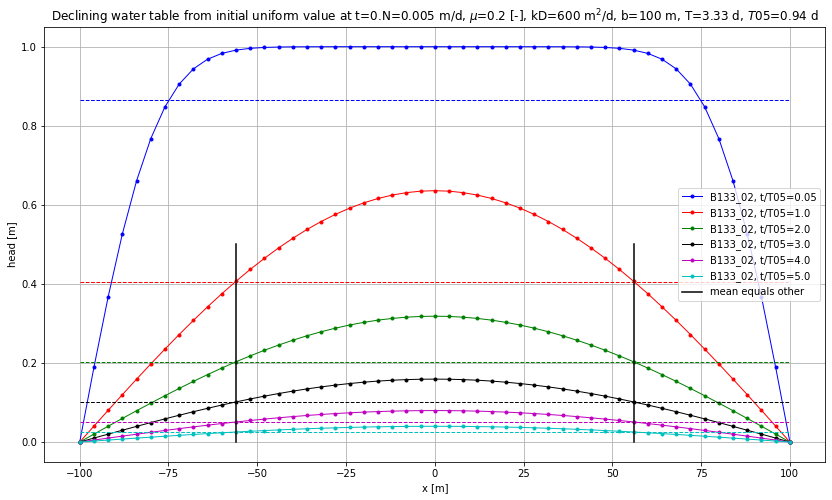

In [376]:
A, kD, S, b = 1, 600, 0.2, 100
T = b**2 * S / kD
T05 = 4 / np.pi ** 2 * np.log(2) * T # Halftime

times = np.hstack((0.05, np.arange(1, 6))) * T05

ttl = r'N={:.3f} m/d, $\mu$={:.1f} [-], kD={:.0f} m$^2$/d, b={:.0f} m, T={:.2f} d, $T05$={:.2f} d'.format(
                                                                                N, mu, kD, b, T, T05)
ax = newfig("Declining water table from initial uniform value at t=0." + ttl, 'x [m]', 'head [m]')

for t, clr in zip(times, clrs()):
    ax.plot(*brug133_02(A=A, kD=kD, S=S, b=b, times=t), clr, ls='-', marker='.', lw=1, label='B133_02, t/T05={:.2}'.format(t/T05))
    ax.plot([-b, b], brug133_02_mean(A=A, kD=kD, S=S, b=b, times=np.array([t, t])), clr, ls='--', lw=1)

f = 2/np.pi * np.arccos(2 / np.pi)
ax.plot(+f * np.array([b, b]), [0, 0.5], 'k', label='mean equals other')
ax.plot(-f * np.array([b, b]), [0, 0.5], 'k')
ax.legend()

plt.show()

## Example

The solution is shown for different values of $x$ along the cross section, including the $x$ where the the water table equals the average value in the cross section.

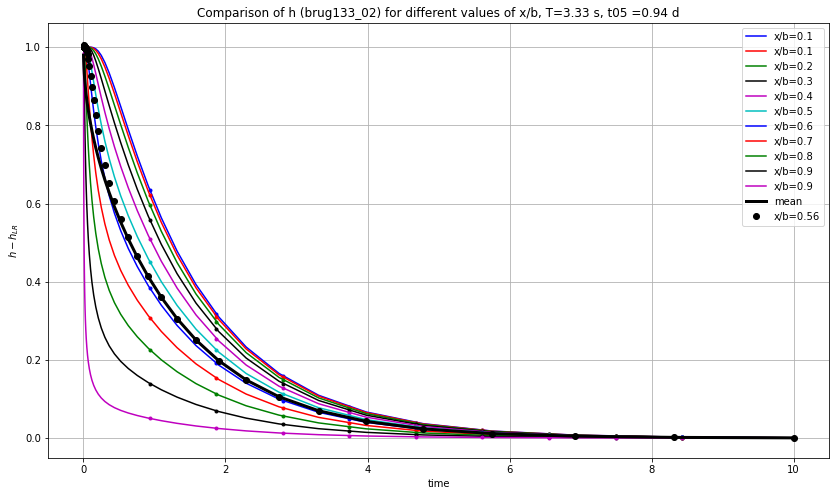

In [283]:
A, kD, S, b, n = 1., 600, 0.2, 100, 20

params = {'A':A, 'kD':kD, 'S':S, 'b':b, 'n':20}

T   = b ** 2 * S / kD
t05 = 4 / np.pi **2 * np.log(2) * T
times = np.logspace(-3, 1, 51)
htimes = t05 * np.arange(1, 10)

X_b = np.linspace(0.05, 0.95, 11)
f = 2 / np.pi * np.arccos(2 / np.pi)

ax = newfig(r"Comparison of h (brug133_02) for different values of x/b, T={:.2f} s, t05 ={:.2f} d".format(T, t05),
                    'time', r'$h - h_{LR}$', xscale='linear')

for x_b, clr in zip(X_b, clrs()):
    x = x_b * b
    ax.plot(times, brug133_02(x=x, times=times, **params), clr, label='x/b={:.1f}'.format(x_b))
    ax.plot(htimes, brug133_02(x=x, times=htimes, **params), clr, ls='none', marker='.')

ax.plot(times, brug133_02_mean(times=times, **params), 'k', lw=3, label='mean')
ax.plot(times, brug133_02(x=f * b, times=times, **params), 'ko', label='x/b={:.2}'.format(f))

ax.legend()
plt.show()

Results of `brug133_02` as a function of time for different $x$-postions in the cross section (see legend). The colored dots are at the half times. The black line is the result of `brug133_02_mean` and the black dots are the results of `brug133_02` for $x = 0.56 b$, where the mean and the actual water table should match, when t is large enough.

# Constant recharge surplus

The solution for a constant recharge from $t=0$ is given by Bruggeman (1999, solution 133.16). It reads:

$$
h_{x,t} -h_{LR} = \frac{N}{b^2-x^2}-\frac{2Nb^2}{kD} \sum_{k=0}^\infty
\frac{\left(-1\right)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{3}}
\cos\left[
\left(k+\frac{1}{2}\right)\pi
\frac{x}{b}
\right]
\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^2\frac{t}{T}\right]
$$
with
$$T = \frac {b^2S}{kD}$$

Note that $\frac{b^2}{kD} = \frac{b^2S}{kDS}=\frac{T}{S}$ so that the factor in front of the $\sum$ can be replaced by $ 2 N \frac {T}{S}$.

This is interesting as it can also be derived directly by integrating the solution of the shower pulse that we had before

$$h_{x,t} - h_{LR}=\frac{2 N}{\mu}
\sum_{k=0}^{\infty}
\left\{
\frac{(-1)^{k}}{\left(k+\frac{1}{2}\right)\pi}
\cos\left[\left(\left(k+\frac{1}{2}\right)\pi\right)\frac{x}{b}\right]
\intop_0^t\exp\left[-\left(\left(k+\frac{1}{2}\right)\pi\right)^{2}\frac{\tau}{T}\right]
d\tau \right\} $$

Worked out, we get

$$h_{x,t}-h_{LR}	=2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left\{ \frac{\left(-1\right)^{k}}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{3}}\cos\left[\pi\left(k+\frac{1}{2}\right)\frac{x}{b}\right]\left(1 - \exp\left[-\left(\pi\left(k+\frac{1}{2}\right)\right)^{2}\frac{kD}{b^{2}\mu}t\right]\right)\right\} $$

or

$$h_{x,t}-h_{LR}	=2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\frac{\left(-1\right)^{k}}{\left(\pi\left(k+\frac{1}{2}\right)\right)^{3}}\cos\left[\pi\left(k+\frac{1}{2}\right)\frac{x}{b}\right]-2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left(1-\exp\left[-\left(\pi\left(k+\frac{1}{2}\right)\right)^{2}\frac{kD}{b^{2}\mu}t\right]\right)$$

The first term is a constant. It happens to be the steady-state solution and may also be written as

$$h_{x,t}-h_{LR}	=\frac{Nb^{2}}{2\,kD}\left(1-\frac{x^{2}}{b^{2}}\right)-2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left(\exp\left[-\left(\pi\left(k+\frac{1}{2}\right)\right)^{2}\frac{kD}{b^{2}\mu}t\right]\right)$$

in which the first term at the right-hand side is the steady-state solution.

For the average head in the cross section, we must integrate along $x$ between 0 and $x=b$ and divide by $b$.

$$\overline{h}_{t}-h_{0}	=2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left\{ \frac{\left(-1\right)^{k-1}}{\left(\pi\left(k+\frac{1}{2}\right)\right)^{3}}\frac{1}{b}\intop_{0}^{b}\cos\left[\pi\left(k+\frac{1}{2}\right)\frac{x}{b}\right]dx\left(1-\exp\left[-\left(\pi\left(k+\frac{1}{2}\right)\right)^{2}\frac{kD}{b^{2}\mu}t\right]\right)\right\} $$

to finally obtain

$$\overline{h}_{t}-h_{0}=2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left\{ \frac{1}{\left(\pi\left(k+\frac{1}{2}\right)\right)^{4}}\left(1-\exp\left[-\left(\pi\left(k+\frac{1}{2}\right)\right)^{2}\frac{kD}{b^{2}\mu}t\right]\right)\right\} $$

for $t\rightarrow\infty$ we get the final steady-state situation

$$\overline{h}_{\infty}-h_{0}	=2\frac{Nb^{2}}{kD}\sum_{k=0}^{\infty}\left\{ \frac{1}{\left(\pi\left(k+\frac{1}{2}\right)\right)^{4}}\right\}$$

with

$$\sum_{k=0}^{\infty}\left\{ \frac{1}{\left(\left(k+\frac{1}{2}\right)\pi\right)^{4}}\right\} = \frac 1 6 $$

we get the correct value for the averge had in the steady-state situation

$$\overline{h}_{\infty}-h_{0} =\frac 1 3 \frac{Nb^{2}}{kD}$$

## Implementation of the brug133_16 solutions

In [231]:
def brug133_16(N=None, kD=None, S=None, b=None, x=None, times=None, n=20):
    """Return head for constant precipitation from t=0.
    
    This is the formula as defined by Bruggeman (1999, solution 133_16). He substracts the
    term with the exponent from the steady state solution.
    
    Parameters
    ----------
    N, kD, S, b: float
        precipitation surplus [L/T], transmissivity [L2/T], storage coefficient [-], half-width of section [L]
    x: float or None
        if None, x-values are generated and also returned as first object.
    times: float or array of floats
        time or times at which the solution is to be computed
    n: int
        number of terms to include
    """
    if x is None:
        x = np.linspace(-b, b, 51)
        s = N / (2 * kD) * (b **2 - x ** 2)
    else:
        s = N / (2 * kD) * (b **2 - x ** 2) * np.ones_like(times)
        
    T = b ** 2 * S / kD
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s -= 2 * N * T / S * (-1) ** k / kp05 ** 3 * np.cos(kp05 * x/b) * np.exp(-kp05 ** 2 * times/T)
    if not np.isscalar(x):
        return x, s
    else:
        return s


def brug133_16_alt(N=None, kD=None, S=None, b=None, x=None, times=None, n=20):
    """Return head for constant precipitation from t=0.
    
    This is the formula as derived from that of a sudden precipitation pulse, leaving in
    als the terms as sums, with no direct relation to the steady state solution.
    
    Parameters
    ----------
    N, kD, S, b: float
        precipitation surplus [L/T], transmissivity [L2/T], storage coefficient [-], half-width of section [L]
    x: float or None
        if None, x-values are generated and also returned as first object.
    times: float or array of floats
        time or times at which the solution is to be computed
    n: int
        number of terms to include
    """
    if x is None:
        x = np.linspace(-b, b, 51)
        s = np.zeros_like(x)
    else:
        s = np.zeros_like(times)
        
    T = b ** 2 * S / kD
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s += 2 * N * T / S * (-1) ** k / kp05 ** 3 * np.cos(kp05 * x/b) * (1 - np.exp(-kp05 ** 2 * times/T))
    if not np.isscalar(x):
        return x, s
    else:
        return s


def brug133_16_mean(kD=None, S=None, b=None, N=None, times=None, n=20):
    """Return mean head for constant precipitation from t=0.
    
    This is the derived solution for the average head in the cross section.
    
    Parameters
    ----------
    kD, S, b, N: float
        transmissivity [L2/T], storage coefficient [-], half-width of section [L], precipitation [L/T]
    times: float or array of floats
        time or times at which the solution is to be computed
    n: int
        number of terms to include
    """
    s = np.zeros_like(times)
        
    T = b ** 2 * S / kD
    for k in range(n):
        kp05 = (k + 0.5) * np.pi
        s += 2 * N * T / S / kp05 ** 4 * (1 - np.exp(-kp05 ** 2 * times/T))
    return s

# Verification that the solultion ultimately reaches the well-known steady state parabolic solution

We apply the `brug133_16` and `brug133_alt` as well as the `brug133_16_mean` solutions for comparison with each other and the steady-state solution. For different halftimes, the graphs are plotted in the same chart. The first as drawn lines, the second as `dot`-markers and the last as dashed horizontal lines. Furthermore, the steady-state solution is plotted as `o` markers for easy identification. Lastly, the vertical black lines indicate where, for sufficiently large times, the $x$-varying lines intersects the line representing the mean water table. This way, all three solutions and the steady-state one are compared and mutually verified.

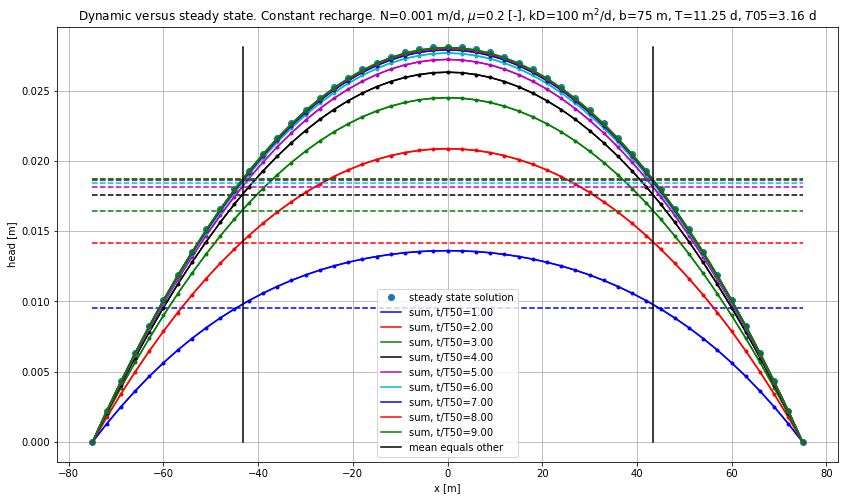

In [381]:
# Verification (in Python) that the steady-state parabolic solution is equivalent with the summation. Note that imports and the def newfig(..) are omitted for brevity

N, kD, b, mu = 0.001, 100, 75, 0.2
T = b ** 2 * mu / kD
T05 = 4/ np.pi **2 * np.log(2) * T # halftime

times = T05 * np.arange(1, 10)

x = np.linspace(-b, b, 51)
h_steady_state = N * b ** 2 / (2 * kD) * (1 - (x/b) ** 2)

ttl = r'N={:.3f} m/d, $\mu$={:.1f} [-], kD={:.0f} m$^2$/d, b={:.0f} m, T={:.2f} d, $T05$={:.2f} d'.format(N, mu, kD, b, T, T05)
ax = newfig("Dynamic versus steady state. Constant recharge. " + ttl, "x [m]", "head [m]")

ax.plot(x, h_steady_state, 'o', label="steady state solution")

params = {'N':N, 'kD':kD, 'S':S, 'b':b, 'n':n}

for t, clr in zip(T05 * np.arange(1, 10), clrs()):
    ax.plot(*brug133_16(times=t, **params), clr, label="sum, t/T50={:.2f}".format(t/T05))
    ax.plot(*brug133_16_alt(times=t, **params), clr, marker='.')
    h_mean = brug133_16_mean(times=t, **params)
    ax.plot([-b, b], [h_mean, h_mean], clr, ls='--')

f = 1 / np.sqrt(3)
hMax = np.max(h_steady_state)
ax.plot(+f * np.array([b, b]), [0, hMax], 'k', label='mean equals other')
ax.plot(-f * np.array([b, b]), [0, hMax], 'k')

ax.legend()

# Simulation of dynamic behavior of the water table by convolution

The water table due to a time-varying input can be computed from `brug133_02` for a pulse recharge, as well as from `brug133_16` derived for continuous recharge. This is done by convolution, using the impulse response or the block response derived from the step response. The impulse response of a unit rain-shower is obtained by zetting the $A=P/\mu$ with $P=1$, i.e. a unit shower (a sudden shower at $t=0$ with a magnitude of 1 [m]). The step response is the result of a constant recharge $N$ of magnitude 1 [m/d] from $t=0$. The block response is the response of a constant unit recharge durign a time step of given length, $\Delta t$. It is obtained by superposing  the negative step response from $t>\Delta t$ on the step response starting at $t=0$. From this it follows that the differnt responses required for convolution to simulate arbitrary input time series are already in place. We only need to set the inputs to unity. That is $A = 1/\mu$ in `brug133_02`, `brug133_02_mean` and $N=1$ in `brug133_16`, `brug133_15_alt` and `brug133_16_mean`.

## Convolution
We may regard the solution above for the sudden head rise at $x=\pm b$ as the result of a pulse of recharge of magnitude $P$ [L] (if we then assume that this recharge immediately reaches the water table).

We may then write

$$h_{0}-h_{LR}=A = \frac{P}{\mu}=\frac{Ndt}{\mu}$$

The head at any time and $x$-value in the cross section can subsequently be computed by convolution:

$$h-h_{LR}=\intop_{\tau=0}^{\infty}N_{t-\tau}R_{x,\tau}d\tau$$

Herein is $N_{t-\tau} d\tau$ the impulse in the past at time $t - \tau$, i.e. at time $\tau$ before the considerd time $t$, and $R_{x,\tau}$ is the impulse response, which is the effect of a unit pulse at time $\tau$ after the event occurred. With $N$ the precipitation on a certain day and $dt$ the length of a day, the integral will turn in a summation.

$$h - h_{LR} = \sum_{i=0}^{\infty}N_{t-\left(i + \frac 1 2\right) \Delta t} dt R_{\left(i + \frac 1 2\right)  \Delta t}$$

The $\frac 1 2$ places the moment of each pulse in the center of the day to which the past recharge pertains.

When using the step response, $R_S$, i.e. solution `brug133_16` with $N=1$, which assumes constant unit recharge, we have the exact response at any time by defitine the block response $R_B$ from it:

$$ R_B(\tau, \Delta t) = R_S(\tau) - R_S(\tau - \Delta t)$$

Hence, writing

$$h_t - h_{LR} = \sum_{i=1}^{\infty} N_{t - i \Delta t} B_R\left(i \Delta t, \Delta t\right)$$

The summation starts at $i=1$, because it is only valid after form end of the day to whch the recharge pertains. But at these points it is mathematically exact, where as the convolution with the impulse response is not completely correct due to the concrete time steps we have chosen. Of course, we can easily adapt the $B_R$ to this detail by prepending a zero representing the exact respons at the beginning of the day for which we wish the head to be computed.

Clearly, there is always the question how far in the past we should take the recharge into account to compute the current head. Theoretically it's infinite as the summation expresses. We may simply take all the values along from the beginning of our input data set. However, that assumes that before the start of our data, precipitation has always been zero. This may, therefore, not yield the correct result. Therefore, either the past data set should be sufficiently long such that its effect on the dates we're interested in can be neglected, or a proper average values of the head at the beginning of our time series has te be known or assumed. It may be computed as the steady state value pertaining to the average precipitation suplus over the period that we actually have data. But doing so, we must subtract this long-term average recharge value from our actual recharge values befofe carrying out the convolution.

In convolution, the integraton is carried out from $-\infty$ to $+\infty$. However in our case, $-\infty$ means in the future, for which there are no data. Therefore, the convolution is done here from 0 to $\infty$.

In practice, this convolution comes down to filtering, that is, the computation of a weightes moving average, in which the weighing is done by the respective response, reversed in time. Therefore, the responses do not have real time as their parameter, but $\tau$, which means that it is relative to the beginning of the impulse. Hence, $t - \tau$ expresses a time in the past, i.e. a time $\tau$ before the real time $t$.

The filtering, which carries out the convolution as we need it, is a standard function called `lfilter()` that resides in the module `scipy.signal`, and, therefore easy to carry out in Python (In Matlab the function `filter` does exactly the same).

The `lfilter` definition is

$$a_0 y_n = b_0 x_n + b_1 x_{n - 1} + ... + b_{nb} x_{n-nb}
                        - a_1 y_{n-1} - ... - a_{na} y_{n-na}
$$

and by taking all $a$ zero

$$y_n = b_0 x_n + b_1 x_{n - 1} + ... + b_{nb} x_{n-nb}
$$

This implies that the value on day $y$ includes the prescipidation on day $n$ and the first response value. This implies that the first value of the block response must be the step response after one day not including the the inverted stepresponse, therefore, the block response

$$ R_B(\tau, \Delta t) = R_S(\tau) - R_S(\tau - \Delta t)$$

must be implemented as

$$R_B = R_S - \mbox{np.hstack}((0, R_S(\tau - \Delta t)))$$


## Implemention of the impulse resonses

We can define the described responses as separate function that use the solution given above, by setting their input equal to unity.

In [358]:
def RI_x(kD=None, S=None, b=None, x=None, taus=None, n=20):
    """Return impulse response for Brug_133_02.
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        x: scalar of np.ndarray or None (default)
            coordinates in cross section
        taus: time or times to compute the result
        n: number of terms to compute
    """
    dtau = np.diff(taus)[0]
    return brug133_02(A=1 / S, kD=kD, S=S, b=b, x=x, times=taus + dtau/2, n=n)

In [359]:
def RI_mean(kD=None, S=None, b=None, taus=None, n=20):
    """Return impulse response for Brug_133_02_mean.
    
    Parameters
    ----------
    S, kD, b : floats
        specific yield, transmissivity and half width of cross section
    taus: sequence of pandas dataframe index with timestamps
        the times
    n: int
        number of terms to compute
    """
    dtau = np.diff(taus)[0]
    return brug133_02_mean(A=1 / S, kD=kD, S=S, b=b, times=taus + dtau/2, n=n)

In [316]:
def RS_x(kD=None, S=None, b=None, x=None, taus=None, n=20):
    """Return step response for Brug_133_16 (constant recharge).
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        x: scalar of np.ndarray or None (default)
            coordinates in cross section
        taus: time or times to compute the result
        n: number of terms to compute
    """
    return brug133_16(N=1., kD=kD, S=S, b=b, x=x, times=taus, n=n)

In [317]:
def RS_mean(kD=None, S=None, b=None, taus=None, n=20):
    """Return step response for Brug_133_16_mean (constant recharge).
    
    Parameters
    ----------
    S, kD, b : floats
        specific yield, transmissivity and half width of cross section
    taus: sequence of pandas dataframe index with timestamps
        the times
    n: int
        number of terms to compute
    """
    return brug133_16_mean(N=1., kD=kD, S=S, b=b, times=taus, n=n)

In [295]:
def RB_x(kD=None, S=None, b=None, x=None, taus=None, n=20):
    """Return block response for Brug_133_16 (constant recharge).
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        x: scalar of np.ndarray or None (default)
            coordinates in cross section
        taus: time or times to compute the result
        n: number of terms to compute
    """
    dtau = np.diff(taus)[-1]
    taus = np.hstack((taus, taus[-1] + dtau)) # make taus one longer to keep its length
    SR = brug133_16(N=1, kD=kD, S=S, b=b, x=x, times=taus[:-1], n=n)
    return SR[1:] - SR[:-1]

In [310]:
def RB_mean(kD=None, S=None, b=None, taus=None, n=20):
    """Return block response for Brug_133_16 (constant recharge).
    
    parameters
    ----------
        S, kD, b : floats, specific yield, transmissivity and half width of cross section
        x: scalar of np.ndarray or None (default)
            coordinates in cross section
        taus: time or times to compute the result
        n: number of terms to compute
    """
    dtau = np.diff(taus)[-1]
    taus = np.hstack((taus, taus[-1] + dtau)) # make taus one longer to keep its length
    SR = brug133_16_mean(N=1, kD=kD, S=S, b=b, times=taus, n=n)
    return  SR[1:] - SR[:-1]

## Examples

The first example will compute the head due to constant recharge both by the solution `brug133_16_mean` and by convolution. The results should be the same.

First we show the different responses. The impulse response `RI_mean` and the block response `RB_mean` are about the same because dt in the block response is 1 d (trhough the provided taus). The correspondence would increas by adding 0.5 d to the taus of the impulse response.

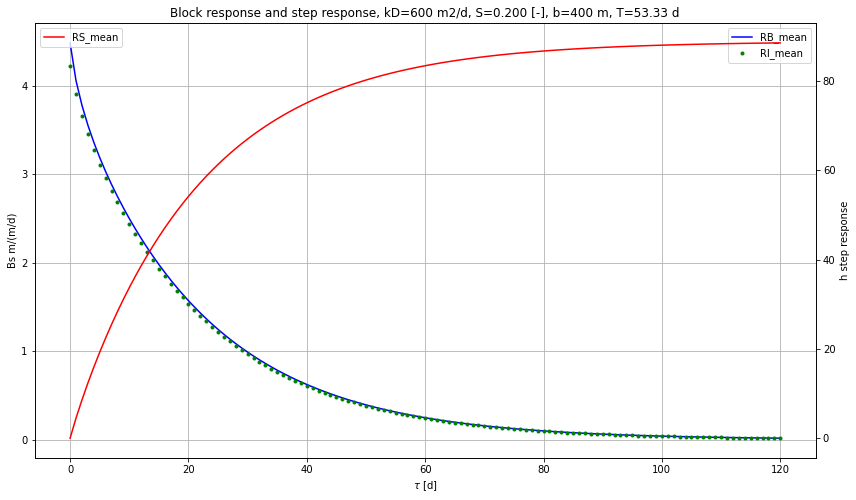

In [369]:
# Properties
kD, S, b = 600., 0.2, 400.
props = {'kD':kD, 'S':S, 'b':b}

T = b ** 2 * S / kD
t05 = 4 / np.pi ** 2 * np.log(2) * T

taus = np.linspace(0, 120, 121) # choose step length equal to 1 d (so RB and RI match)

ttl = 'kD={:.0f} m2/d, S={:.3f} [-], b={:.0f} m, T={:.2f} d'.format(kD, S, b, T)
ax = newfig('Block response and step response, ' + ttl, r'$\tau$ [d]', 'Bs m/(m/d)')

ax2 = ax.twinx()
ax2.set_ylabel('h step response')
ax.plot(taus, RB_mean(taus=taus, **props), 'b', label='RB_mean')

# Note that 0.5 days is added to taus to place the puls in the center of the time steps.
ax.plot(taus, RI_mean(taus=taus + 0.5, **props), 'g.', label='RI_mean')

# A different axes is used to allow plotting its different scale.
ax2.plot(taus, RS_mean(taus=taus, **props), 'r', label='RS_mean')
ax.legend()
ax2.legend()

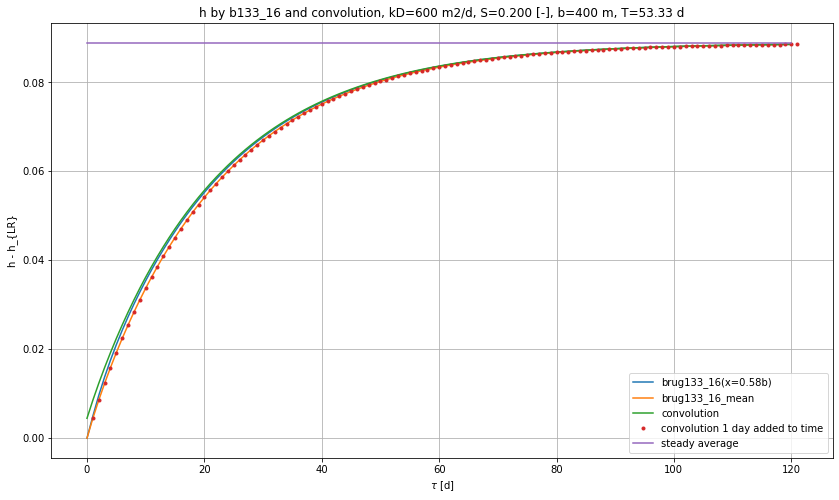

In [370]:
ttl = 'kD={:.0f} m2/d, S={:.3f} [-], b={:.0f} m, T={:.2f} d'.format(kD, S, b, T)
ax = newfig('h by b133_16 and convolution, ' + ttl, r'$\tau$ [d]', 'h - h_{LR}')

f = 1 / np.sqrt(3)
N = 0.001

times = np.linspace(0, 120, 121)
ax.plot(times, brug133_16(x=f * b, times=times, N=N, **props), label='brug133_16(x={:.2f}b)'.format(f))
ax.plot(times, brug133_16_mean(times=times, N=N, **props), label='brug133_16_mean')

ax.plot(times, lfilter(RB_mean(taus=times, **props), 1, N * np.ones_like(times)), label='convolution')
ax.plot(times + 1, lfilter(RB_mean(taus=times, **props), 1, N * np.ones_like(times)), '.', label='convolution 1 day added to time')

ax.plot(times[[0,-1]], 1/3 * N * b ** 2 / kD * np.ones(2), label='steady average')
ax.legend()
plt.show()

The above proves that the two methods are equivalent. The impulse response, in fact the Kraaijenhoff vd Leur solution equals the block response derived from Bruggeman's solution for the step response of a unit perpetual recharge starting at $t=0$. Notice that the convolution does not start at zero. That is because the first value of the result is the head at the end of the first day, i.e. at the end of the day during which the rechage of that same first day occurred. This happens when descrite time steps are used. On a continuous time scale, one would add that day. This line is also shown, and it matches the analytical result of brug133_16_mean perfectly.

## Convolution with arbitrary input, using both the impulse response `RI_mean` and the block response `BR_mean`.

A random value is added to the given mean recharge to generate arbitrary recharge data. Then convolution is applied in exactly the same way as before, only the input differs. To show the comparison, the convolution is done with the impulse respons as wel as  with the block response. Note that for the block response, 1 day is added to the output times, to match the continuous time scale used in the graph, that actually then plots the resulting head at the end of of day 0 and not at the start of day 0. This correction is due to the lfilter working with descrite data. Also note that in the impulse respose function, 0.5 times the step size is added to the times, as to place the pulse in the center of the time steps.

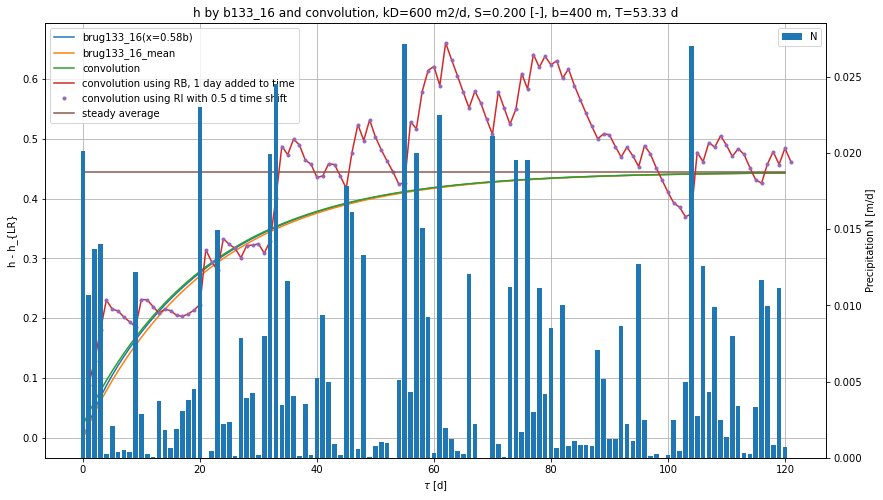

In [371]:
ttl = 'kD={:.0f} m2/d, S={:.3f} [-], b={:.0f} m, T={:.2f} d'.format(kD, S, b, T)
ax = newfig('h by b133_16 and convolution, ' + ttl, r'$\tau$ [d]', 'h - h_{LR}')

f = 1 / np.sqrt(3)
N = 0.005

r = np.random.randn(len(times)) ** 2
times = np.linspace(0, 120, 121)

ax.plot(times, brug133_16(x=f * b, times=times, N=N, **props), label='brug133_16(x={:.2f}b)'.format(f))
ax.plot(times, brug133_16_mean(times=times, N=N, **props), label='brug133_16_mean')

ax.plot(times, lfilter(RB_mean(taus=times, **props), 1, N * np.ones_like(times)), label='convolution')
ax.plot(times + 1, lfilter(RB_mean(taus=times, **props), 1, N * r), label='convolution using RB, 1 day added to time')
ax.plot(times + 1, lfilter(RI_mean(taus=times, **props), 1, N * r), '.', label='convolution using RI with 0.5 d time shift')

ax.plot(times[[0,-1]], 1/3 * N * b ** 2 / kD * np.ones(2), label='steady average')

ax2 = ax.twinx()
ax2.set_ylabel('Precipitation N [m/d]')
ax2.bar(times, N * r, label='N')
ax.legend()
ax2.legend()
